# Chicago Crime Analysis
  Team 7a 
  
  Alice Jiang, Chuning Chen, Jingjing Lu, Xuanqi Liang, Yantao Wang

### Business Problem
Our goal is to analyze the crime rate in Chicago and to provide recommendations to the local police and residence. We analyzed our datasets  from various aspects, including crime type, growth rate, location, and time. Moreover, we were interested to explore how COVID19 impacts the crime rate in 2020, especially if quarantine would be influential with number of crime cases happening in the city. 

In this project, we also applied machine learning forecasting model to predict crime cases in different day of week, hour of day, temperature, and rainfall. The predicted results are used to help Chicago police to schedule and allocate their staffs.

Tableau Dashboard Link: https://public.tableau.com/profile/alice.jiang#!/vizhome/BA775-7a-ChicagoCrimeAnalysis-Finalized1_16043437530950/Dashboard3_1?publish=yes

## Agenda    
#### I. Dataset Overview
    1. Chicago Crime Dataset Overview
        1.1 Original Dataset Preview
        1.2 Preprocessing 
            1.2.1 Feature Selection
            1.2.2 Data Quality Check
    2. Covid19 Dataset Overview
        2.1 Original Dataset Preview
        2.2 Preprocessing 
            2.2.1 Feature Selection
            2.2.2 Data Quality Check
#### II. Analysis Tasks    
    Topic 1: Crime Type
        Q1.1 In the past 20 years, what are the Top 10 crime types in Chicago?
        Q1.2 What sub-categories of the top crime are the most popular? 
        Q1.3 How the top crime types changed in the past years? 
        
    Topic 2: Growth Rate of Chicago Crime Over Year
        Q2.1 In the past 20 years, how was the variation of crime rate? Increasing or decreasing?
    
    Topic 3: District Distribution
        Q3.1 How crime rate varies in different district?
        Q3.2 Which district is the safest in Chicago (the lowest crime rate)?
        Q3.3 Which district is the most dangerous in Chicago (the highest crime rate)?
        Q3.4 In the most dangerous district, which blocks are more danger?
        
    Topic 4: Seasonal, Day of the Week, Periodic Effect
        Q4.1 How crime cases change in different date? 
        Q4.2 In 2019, how was the average daily crime changes over months?
        Q4.3 Which day of week tends to have higher crime? In which period?
        
    Topic 5: COVID19 Effect
        Q5.1 Comparing crime cases in 2019 and 2020, what is the main difference between these years? Does outbreak of COVID19 or shutdown affect the amount of crime cases?
    
    Topic 6: Crime Cases Prediction with Machine Learning Forecasting Model
        6.1 Feature Selection and Training Dataset Creation
        6.2 Model Creation
        6.3 Model Performance Evaluation
        6.4 Feature Engineering
        6.5 Retrain Model
        6.7 Optimized Model Prediction 
#### III. Challenges
    1. Typo
    2. Date format
#### IV. Conclusion




## I. Dataset Overview

### 1. Chicago Crime Dataset Overview

Chicago Crime Data ID: bigquery-public-data:chicago_crime

Origin Source: https://data.cityofchicago.org/

#### 1.1 Original Data Preview

In [17]:
%%bigquery
SELECT *
FROM `bigquery-public-data.chicago_crime.crime` limit 5

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,10272397,HY460527,2015-10-09 00:00:00+00:00,111XX S KEDZIE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,19,74,20,NaN,NaN,2015,2016-04-15 11:16:05+00:00,NaN,NaN,None
1,7922533,HT153755,2008-10-01 08:00:00+00:00,062XX N LEONA AVE,1121,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,RESIDENCE,False,False,...,45,12,10,NaN,NaN,2008,2015-08-17 15:03:40+00:00,NaN,NaN,None
2,2384500,HH690388,2002-10-03 20:30:00+00:00,070XX W BELMONT AVE,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,False,False,...,36,18,26,NaN,NaN,2002,2015-08-17 15:03:40+00:00,NaN,NaN,None
3,6342921,HP430764,2005-01-01 08:00:00+00:00,027XX N RUTHERFORD AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,36,18,20,NaN,NaN,2005,2015-08-17 15:03:40+00:00,NaN,NaN,None
4,6659610,HP735072,2008-12-13 17:00:00+00:00,130XX S CARONDOLET AVE,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,PARK PROPERTY,False,False,...,10,55,14,NaN,NaN,2008,2015-08-17 15:03:40+00:00,NaN,NaN,None


The original Chicago Crime dataset contains the daily update reported crime from 2001 to 2020. There are 7,217,143 rows and 22 columns in total. However, some features were irrelavent with our analysis. In order to save the processing time, we extracted the useful columns only in the next step.

#### 1.2 Preprocessing 
##### 1.2.1 Feature Selection

In [22]:
%%bigquery
SELECT case_number, date, block, primary_type, description, district, community_area, year, latitude, longitude
FROM `bigquery-public-data.chicago_crime.crime` LIMIT 5

,case_number,date,block,primary_type,description,district,community_area,year,latitude,longitude
0,HH618251,2002-09-01 02:05:00+00:00,070XX W GRAND AVE,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,25,18,2002,NaN,NaN
1,JA146021,2015-07-02 12:00:00+00:00,093XX S MUSKEGON AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,4,48,2015,NaN,NaN
2,HZ233111,2015-10-19 09:54:00+00:00,084XX S BLACKSTONE AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,4,45,2015,NaN,NaN
3,HS416167,2010-07-16 18:00:00+00:00,064XX N OLIPHANT AVE,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,16,9,2010,NaN,NaN
4,JA182404,2012-02-09 00:00:00+00:00,090XX S CLYDE AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,4,48,2012,NaN,NaN


The selected features were stored in `ba775-team-7a.project.crime` 

##### 1.2.2  Data Quality Check

In [26]:
%%bigquery
SELECT 
    sum(IF(date is null,1,0)) as date_null,
    sum(IF(block is null,1,0)) as block_null,
    sum(IF(primary_type is null,1,0)) as primary_type_null,
    sum(IF(description is null,1,0)) as description_null,
    sum(IF(district is null,1,0)) as district_null,
    sum(IF(community_area is null,1,0)) as community_null,
    sum(IF(year is null,1,0)) as year_null,
    sum(IF(latitude is null,1,0)) as latitude_null,
    sum(IF(longitude is null,1,0)) as longitude_null
FROM `ba775-team-7a.project.crime` 

,date_null,block_null,primary_type_null,description_null,district_null,community_null,year_null,latitude_null,longitude_null
0,0,0,0,0,47,613484,0,74352,74352


In Chicago Crime dataset, we use IF clause in each column to find null values. If the column has missing value, then the value '1' will be marked down. We sum result in each column to see the total number of missing values. 

There are 47 null values in distrct and 613484 null values in community area. Also, there are 74352 null values in latitude and longitude, respectively. 
The null values would be excluded by WHERE cluase if needed.

### 2. COVID19 Dataset Overview

COVID19 Dataset ID: bigquery-public-data:covid19_open_data

#### 2.1 Original Data Preview

In [6]:
%%bigquery
SELECT * FROM `bigquery-public-data.covid19_open_data.covid19_open_data` LIMIT 5

,date,location_key,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,...,datacommons_id,openstreetmap_id,latitude,longitude,location_geometry,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm
0,2020-02-24,US_UT_49049,US,United States of America,UT,Utah,49049,Utah County,US,USA,...,geoId/49049,1744370,40.12,-111.67,POINT(-111.67 40.12),2.472222,-2.986111,9.208333,0.0,NaN
1,2020-02-25,US_UT_49049,US,United States of America,UT,Utah,49049,Utah County,US,USA,...,geoId/49049,1744370,40.12,-111.67,POINT(-111.67 40.12),-1.222222,-7.618056,4.944444,0.0,NaN
2,2020-02-26,US_UT_49049,US,United States of America,UT,Utah,49049,Utah County,US,USA,...,geoId/49049,1744370,40.12,-111.67,POINT(-111.67 40.12),-0.944444,-8.180556,7.131944,0.0,NaN
3,2020-02-27,US_UT_49049,US,United States of America,UT,Utah,49049,Utah County,US,USA,...,geoId/49049,1744370,40.12,-111.67,POINT(-111.67 40.12),1.618056,-7.534722,10.118056,0.0,NaN
4,2020-02-28,US_UT_49049,US,United States of America,UT,Utah,49049,Utah County,US,USA,...,geoId/49049,1744370,40.12,-111.67,POINT(-111.67 40.12),3.285714,-5.214286,13.031746,0.0,NaN


The COVID19 dataset contains country-level datasets of daily time-series data related to COVID-19 globally. The original Dataset contains 6,112,480 rows and 45 features. We extracted the useful columns only in the next step. Moreover, we limited the output in Cook County, IL in U.S., becasue the Crime dataset is related to Chicago only.

#### 2.2 Preprocessing 
##### 2.2.1 Feature Selection

In [8]:
%%bigquery
SELECT date, new_confirmed, new_deceased, average_temperature_celsius, rainfall_mm
FROM `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE country_code='US'
and subregion1_code ='IL'
and subregion2_name='Cook County' LIMIT 5

,date,new_confirmed,new_deceased,average_temperature_celsius,rainfall_mm
0,2020-01-01,NaN,NaN,-1.104938,0.225778
1,2020-01-02,NaN,NaN,5.679012,0.000000
2,2020-01-03,NaN,NaN,3.913580,0.000000
3,2020-01-04,NaN,NaN,0.469136,0.127000
4,2020-01-05,NaN,NaN,-0.049383,0.028222


The selected featured were stored in `ba775-team-7a.project.covid19`

##### 2.2.2 Data Quality Check

In [20]:
%%bigquery
SELECT 
    sum(IF( date is null,1,0)) as date_null,
    sum(IF( new_confirmed is null,1,0)) as new_confirmed_null,
    sum(IF( new_deceased is null,1,0)) as new_deceased_null,
    sum(IF( average_temperature_celsius is null,1,0)) as temperature_null,
    sum(IF( rainfall_mm is null,1,0)) as rainfall_null
FROM `ba775-team-7a.project.covid19` 

,date_null,new_confirmed_null,new_deceased_null,temperature_null,rainfall_null
0,0,27,27,7,7


Similarly, we applied IF caluse to find missing values. In COVI19 dataset, there are 27 null values in new_confirmed and new_deceased columns, respectively. Also, there are 7 null values in average_temperature_celsius and rainfall_mm, respectively. 
The null values would be excluded by WHERE cluase if needed.

## II. Analysis Tasks
#### Analysis Topic 1: Crime Type
#### [Question 1.1] In the past 20 years, what are the Top 10 crime types in Chicago?

In [1]:
%%bigquery
SELECT primary_type as crime_type, count(*)as cases
FROM `ba775-team-7a.project.crime` 
GROUP BY primary_type
ORDER BY cases desc limit 10

,crime_type,cases
0,THEFT,1523656
1,BATTERY,1322356
2,CRIMINAL DAMAGE,822148
3,NARCOTICS,734217
4,ASSAULT,456733
5,OTHER OFFENSE,447913
6,BURGLARY,406517
7,MOTOR VEHICLE THEFT,332261
8,DECEPTIVE PRACTICE,298013
9,ROBBERY,271161


We select the primary types of cases and count the total numbers of each type of case, then list the results in a descending order of the amount of each type of cases. The top ten crime types of Chicago in the past 20 years are listed in the results. There are two types of cases that have significantly higher numbers than others (over 1 million). The most common case is theft, which has a total number of 1,523,656. The second one is battery, which has a total number of 1,322,356.

#### [Question 1.2] What sub-categories of the top crime are the most popular? 

In [2]:
%%bigquery
SELECT primary_type as crime_type, description,count(*) as cases
FROM `ba775-team-7a.project.crime` 
WHERE primary_type = 'THEFT'
GROUP BY description,primary_type
ORDER BY count(*) desc limit 5;

,crime_type,description,cases
0,THEFT,$500 AND UNDER,587857
1,THEFT,OVER $500,373830
2,THEFT,FROM BUILDING,243553
3,THEFT,RETAIL THEFT,184805
4,THEFT,FINANCIAL ID THEFT: OVER $300,44530


Following the first query we look into sub-categories of the top crime type, which is theft. We count the most common descriptions of theft cases. We listed the top five sub-categories of theft from all the theft cases. The most common among them is petty theft with an amount less or equal to 500 dollars, following by theft with an amount over 500 dollars, theft from building, retail theft, and financial ID theft with an amount over 300 dollars.

Based on the above results from Q1.1 and Q1.2, our advice to tourists and citizens is to take good care of their personal belongings and their personal safety. Companies and offices should strengthen protection after getting off work. Chicago police office and security guards should strengthen their patrols.

#### [Question 1.3] How the top crime types changed in the past years? 

In [4]:
%%bigquery
SELECT year, primary_type, count(*) as cases 
FROM `ba775-team-7a.project.crime` 
WHERE year =2001
GROUP BY year,primary_type
ORDER BY count(*) desc limit 5

,year,primary_type,cases
0,2001,THEFT,99266
1,2001,BATTERY,93445
2,2001,CRIMINAL DAMAGE,55852
3,2001,NARCOTICS,50567
4,2001,ASSAULT,31384


In [4]:
%%bigquery
SELECT year, primary_type, count(*)as cases 
FROM `ba775-team-7a.project.crime` 
WHERE year =2020
GROUP BY year,primary_type
ORDER BY count(*) desc limit 5 

,year,primary_type,cases
0,2020,BATTERY,34436
1,2020,THEFT,33745
2,2020,CRIMINAL DAMAGE,20465
3,2020,ASSAULT,15040
4,2020,DECEPTIVE PRACTICE,10850


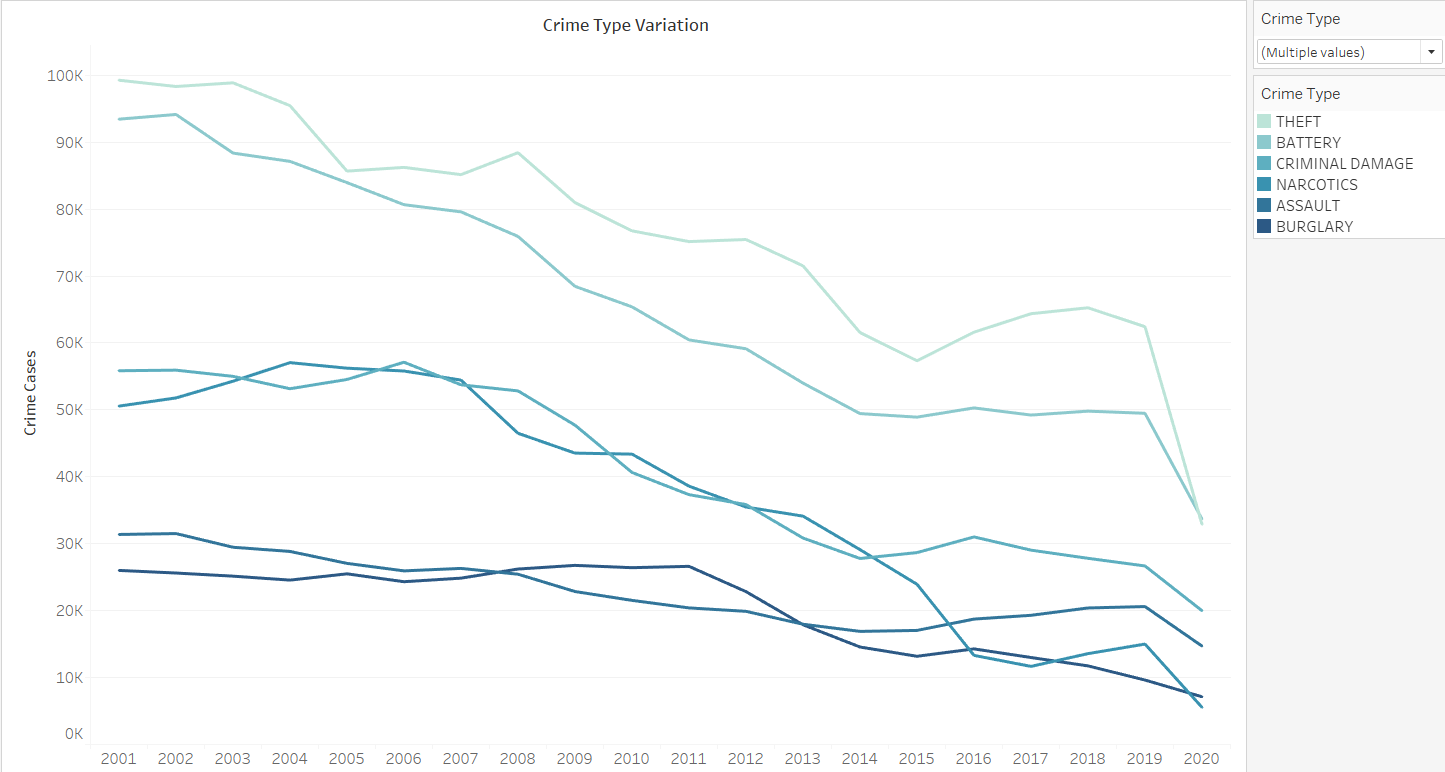

In this part, we look into the overall trend of crime types. 
First, we select the top 5 common crime types in 2001 and 2020. In 2001, the top 5 crime types are theft, battery, criminal damage, narcotics and assault. In 2020, the top 5 crime types are battery, theft, criminal damage, assault and deceptive practice. The most common crime types did not change over years.
We are then interested to explore how other crime types changed over year. Therefore, we select six common types of crime from the past 20 years to perform the visualization. As the stacked-line chart shows, the numbers of all types of cases have shown a downward trend. Our team once guessed that the number of burglary cases would increase during the epidemic in 2020. However, the plot above demonstrated that there is no increasing trend of burglary.
In order to reinforce the safety issue, Chicago policy need to pay extra attention on these types of crime. 


Note: Missing data from October, November and December 2020 need to be taken into account when looking into the significant decrease of all types of crime from 2019 to 2020.

#### Analysis Topic 2: Growth Rate of Chicago Crime
#### [Question 2.1] In the past 20 years, how was the variation of crime rate? Increasing or decreasing?

In [3]:
%%bigquery
WITH c AS (
    WITH b AS(
        SELECT count(*) as cases,year
        FROM `ba775-team-7a.project.crime`
        GROUP BY year)
    SELECT 
      year,
      cases,
      lag(cases,1)over (order by year)as last_yr_cases
      FROM b
      ORDER BY year)
    SELECT year, cases, last_yr_cases,
    ROUND((cases-last_yr_cases)/last_yr_cases,4)as growth_rate
    FROM c
    ORDER BY year

,year,cases,last_yr_cases,growth_rate
0,2001,485783,NaN,NaN
1,2002,486764,485783.0,0.0020
2,2003,475962,486764.0,-0.0222
3,2004,469396,475962.0,-0.0138
4,2005,453736,469396.0,-0.0334
5,2006,448138,453736.0,-0.0123
6,2007,437041,448138.0,-0.0248
7,2008,427099,437041.0,-0.0227
8,2009,392771,427099.0,-0.0804
9,2010,370395,392771.0,-0.0570


After we explored the several crime types changed over year. We would like to calculate growth rate of total crime cases over years. 

In the past 20 years, almost all growth rate of crime rates in Chicago are negative values. In other words, the total crime was lower than previous year. The total crime in 2019 (260,355) is approximately half of total crime in year 2001 (485,783). The significant low growth rate in 2020 may due to two reasons. First, the data for 2020 is not complete yet. Secondly, the COVID19 in 2020 has impact on total crime. The detailed COVID19 impact is coverd in section 5.1. In general, the safty condition in Chicago is getting better.

#### Analysis Topic 3: District Distribution
#### [Question 3.1] How crime rate varies in different district?

In [5]:
%%bigquery
SELECT district, COUNT(*) as cases
FROM `ba775-team-7a.project.crime`
WHERE district is not null
GROUP BY district
ORDER BY count(*) desc

,district,cases
0,8,487771
1,11,465143
2,7,424056
3,6,419418
4,25,413633
5,4,408589
6,3,366167
7,9,355668
8,12,353731
9,2,341055


In order to find the total crime in each district, we exclude the district with null values first. Then, we count the total cases and group by district. We rank the output as descending order, which can observe the trend clearly.

#### [Question 3.2] Which district is the safest in Chicago (the lowest crime rate)?

In [6]:
%%bigquery
SELECT district, COUNT(*) as cases
FROM `ba775-team-7a.project.crime` 
WHERE district is not null
GROUP BY district
ORDER BY count(*) limit 1;

,district,cases
0,21,4


By ordering the result in ascending order, the district with lowest crime is in the top which is district 21. The safestest district has only 4 cases. 

#### [Question 3.3] Which district is the most dangerous in Chicago (the highest crime rate)?

In [1]:
%%bigquery
SELECT district, COUNT(*) as cases
FROM `ba775-team-7a.project.crime`
WHERE district is not null
GROUP BY district
ORDER BY count(*) desc limit 1

,district,cases
0,8,487771


The district 8 is the most dangerous part in Chicago. There are 487771 crime cases happened in this district. 


#### [Question 3.4] In the most dangerous district, which blocks are more danger?

In [13]:
%%bigquery
SELECT block,primary_type,description,count(*) as cases
FROM `ba775-team-7a.project.crime`
WHERE district =8
GROUP BY block, primary_type,description
ORDER BY cases desc limit 10;

,block,primary_type,description,cases
0,076XX S CICERO AVE,THEFT,RETAIL THEFT,5160
1,061XX S WESTERN AVE,THEFT,RETAIL THEFT,893
2,076XX S CICERO AV,THEFT,$500 AND UNDER,701
3,076XX S CICERO AVE,THEFT,$500 AND UNDER,629
4,076XX S CICERO AVE,THEFT,OVER $500,548
5,057XX S CICERO AVE,THEFT,FROM BUILDING,516
6,076XX S CICERO AVE,THEFT,FROM BUILDING,515
7,050XX S KEDZIE AVE,THEFT,RETAIL THEFT,503
8,070XX S PULASKI RD,THEFT,RETAIL THEFT,493
9,051XX S PULASKI RD,THEFT,$500 AND UNDER,466


After we found the most danerous district, we would like to see which block has more crime cases. We select the block, crime type, description, and count of crime cases. The result is order by deacending order.

As we can see, there is an obvious typo in the third row. The block name should be end as "AVE" instead of "AV". Moreover, there are 701 reported cases in this mis-spelled block. We use UPDATE clause to fix the typo.

In [2]:
# UPDATE `ba775-team-7a.project.crime` SET block= "076XX S CICERO AVE" WHERE block= '076XX S CICERO AV';

In [8]:
%%bigquery
SELECT block,primary_type,description,count(*) as cases
FROM `ba775-team-7a.project.crime`
WHERE district =8
GROUP BY block, primary_type,description
ORDER BY cases desc limit 10;

,block,primary_type,description,cases
0,076XX S CICERO AVE,THEFT,RETAIL THEFT,5160
1,076XX S CICERO AVE,THEFT,$500 AND UNDER,1330
2,061XX S WESTERN AVE,THEFT,RETAIL THEFT,893
3,076XX S CICERO AVE,THEFT,OVER $500,674
4,057XX S CICERO AVE,THEFT,FROM BUILDING,516
5,076XX S CICERO AVE,THEFT,FROM BUILDING,515
6,076XX S CICERO AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,506
7,050XX S KEDZIE AVE,THEFT,RETAIL THEFT,503
8,070XX S PULASKI RD,THEFT,RETAIL THEFT,493
9,051XX S PULASKI RD,THEFT,$500 AND UNDER,466


After update the typo, we run the query again. The result is different than the previous one. 

The block in 076XX S CICERO AVE has significant higher crime cases than other blocks. The common crime in this block are retail theft and less or qual to 500 dollars theft. 

For people who are intrested in starting business in Chicago, they should try to aviod this block. Moreover, Chicaogo police should send more people around this area.

#### Analysis Task 4: Seasonal, Day of the Week, and Periodic Effect 
#### [Question 4.1] How crime cases change in different date? 

In [1]:
%%bigquery
SELECT 
  EXTRACT(month FROM date) as month, extract (day from date) as date, count(*) as cases
FROM `ba775-team-7a.project.crime`
GROUP BY month, date
ORDER BY cases desc limit 10;

,month,date,cases
0,1,1,30522
1,6,1,25357
2,8,1,24870
3,7,1,24539
4,9,1,24400
5,10,1,23769
6,11,1,23212
7,5,1,23096
8,7,15,22689
9,4,1,22540


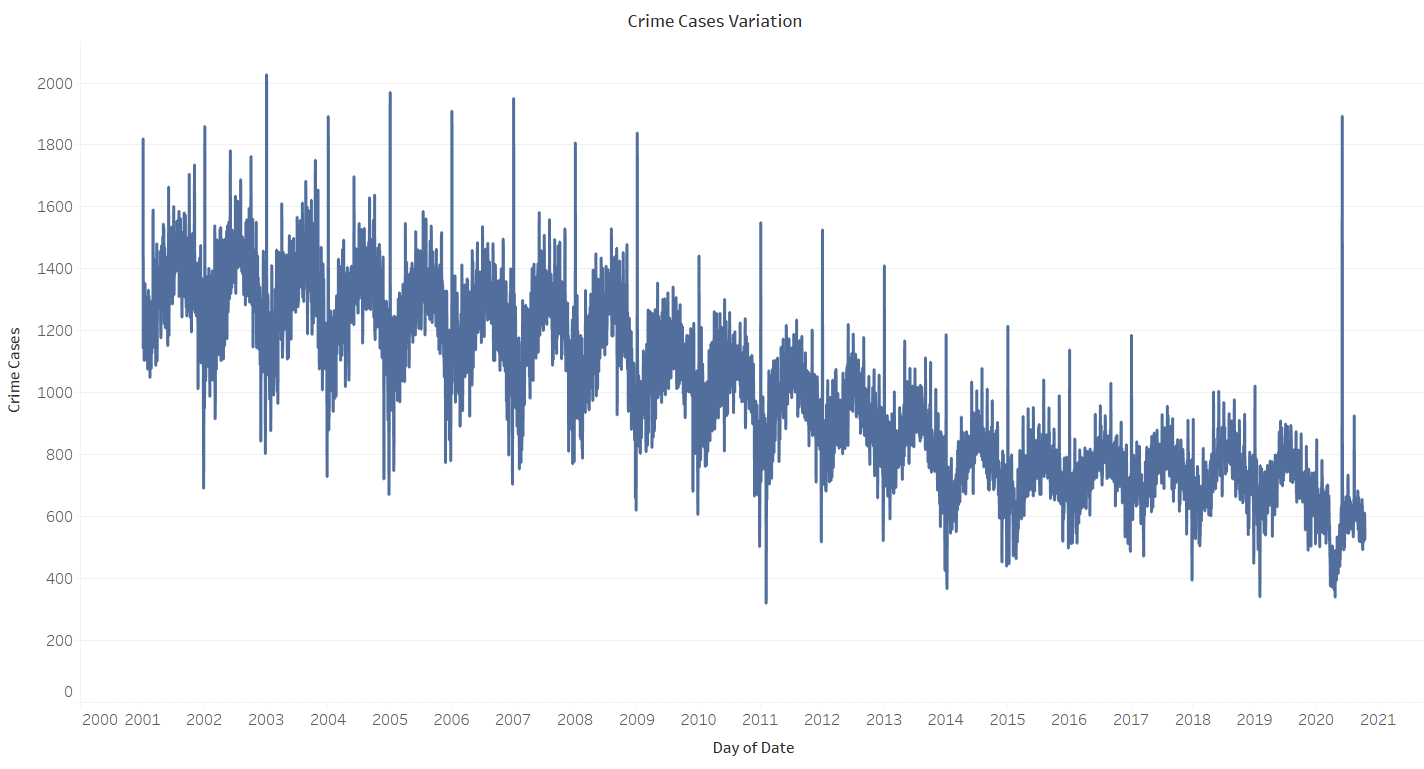

Under this question, we ordered by case number to get the result of the crime cases changes on a different date. In Chicago, we can see the highest crime rate in the top 10 dates; nine of them were the first day of that month; the remaining day is the 15th. And January 1 has the highest crime cases. The article “How Often Should an Employer Pay Employees?” indicated that the standard options for paying employees are weekly, usually on the first and 15th of the month. That may be a reason that the first day of each month has more probability of crime happen.

The line chart named "Crime Cases Variation" represents that Janurary 1st in each year has abnormal high crime cases among the year. In contrast, the lowest crime date in a year is around December 25th. We believe that holiday has strong conection with the number of crime cases on that day. As for the extremy high value on May 31 2020, rebellion after killing of George Floyd (May 25th) could be the main reason. 


#### [Question 4.2] In 2019, how was the average daily crime changes over months?

In [2]:
%%bigquery
SELECT *, ROUND(total_cases/cast(days_per_month as int64),0) as avg_daily_crime
FROM(
    SELECT 
      CASE
      WHEN EXTRACT(month FROM date) in (3,4,5) THEN 'Spring'
      WHEN EXTRACT(month FROM date) in (6,7,8) THEN 'Summer'
      WHEN EXTRACT(month FROM date) in (9,10,11) THEN 'Fall'
      ELSE 'Winter' 
      END AS season,
      extract(month from date) as month, count(*) as total_cases,
      CASE 
      WHEN extract(month from date) in (1,3,5,7,8,10,12) then '31'
      WHEN extract(month from date) in (4,6,9,11) then '30'
      ELSE '28'
      END AS days_per_month
    FROM `ba775-team-7a.project.crime` 
    WHERE extract(year from date) =2019
    GROUP BY season,month,days_per_month
    ORDER BY month
)
ORDER BY avg_daily_crime desc

,season,month,total_cases,days_per_month,avg_daily_crime
0,Summer,7,24817,31,801.0
1,Summer,6,23570,30,786.0
2,Summer,8,24349,31,785.0
3,Spring,5,23622,31,762.0
4,Fall,9,22392,30,746.0
5,Spring,4,20993,30,700.0
6,Fall,10,21634,31,698.0
7,Winter,12,20708,31,668.0
8,Fall,11,19870,30,662.0
9,Spring,3,20399,31,658.0


This question is to determine how the average daily crime changed over a month in the most recent year (year 2019). We extracted month and labeled as four seasons by case clause. From this table, we could see the months with a higher average daily crime are the months in the summer season. Also, in the top five months with the highest crime rate, from May to September, the warmest months during the year. In order to distinguish between leap years and peace years, we choose the data in 2019 only.


According to table in Q4.1 which reflects the historical crime, the highest crime cases happens in Januaray 1st. However, the table above demostrated that Januaray ranked as the lowest month with average daily crime. We believe that the concentrated crime on Januaray 1st is related with the holiday issue. We recommend Chicago visitors and residences to pay attention on safty and personal belonging while celebrating the New Year. 


#### [Question 4.3] Which day of week tends to have higher crime? In which period?

In [11]:
%%bigquery
SELECT
FORMAT_DATE('%A', extract(Date from date)) as day_of_week,
CASE 
  WHEN extract(hour FROM date) in (1,2,3,4) then 'midnight'
  WHEN extract(hour FROM date) in (5,6,7,8) then 'sunrise'
  WHEN extract(hour FROM date) in (9,10,11,12) then 'morning'
  WHEN extract(hour FROM date) in (13,14,15,16) then 'afternoon'
  WHEN extract(hour FROM date) in (17,18,19,20) then 'dusk'
  ELSE 'evening'
  END as period,
COUNT(case_number) as cases
FROM `ba775-team-7a.project.crime`
GROUP BY period, day_of_week
ORDER BY cases desc limit 5

,day_of_week,period,cases
0,Friday,dusk,241004
1,Wednesday,dusk,235262
2,Saturday,evening,234384
3,Tuesday,dusk,233583
4,Friday,evening,233404


After getting the relationship among the crime rate, specific date, and season, we would like to know which day of week and period trends to have higher crime. We use format_date clause to find the corresponding day of week. Also, we separate a day into 6 different periods -- midnight, sunrise, morning, afternoon, dusk, and evening.

Based on the results, dusk of Friday is relative danger with higher crime cases. In general, dusk and evening are the main periods with crime happened. The non-working hours from 17 to 0 are more likely to have crime. The Chicago police officers should schedule more police from hours 17 to 0 in a day, espicially Friday 5pm to 8pm. 

#### Analysis Topic 5: COVID19 Effect 
#### [Question 5.1] Comparing crime cases in 2019 and 2020, what is the main difference between these years? Does outbreak of COVID19 or shutdown affect the amount of crime cases?

In [1]:
%%bigquery
SELECT
*
FROM (
  SELECT
  extract(year from date) as year2019,extract(month from date) as month2019,count(case_number)as cases2019
   FROM `ba775-team-7a.project.crime`
   where extract(year from date)=2019
   group by month2019,year2019
   order by cases2019
   ) limit 3

,year2019,month2019,cases2019
0,2019,2,18381
1,2019,1,19620
2,2019,11,19870


The 2019 monthly crime cases data saved in `ba775-team-7a.chicago_crime.2019_data`

In [2]:
%%bigquery
SELECT
*
FROM (
  SELECT
  extract(year from date) as year2020,extract(month from date) as month2020,count(case_number)as cases2020
   FROM `ba775-team-7a.project.crime`
   where extract(year from date)=2020
   group by month2020,year2020
   order by cases2020
   ) limit 3

,year2020,month2020,cases2020
0,2020,10,10676
1,2020,4,12735
2,2020,3,16521


The 2020 monthly crime cases data saved in `ba775-team-7a.chicago_crime.2020_data`

In order to calculate the crime case difference in each month, we joined the two tables which created above. 

In [3]:
%%bigquery
SELECT
month2020 as month ,cases2019,cases2020,(b.cases2020-a.cases2019) as difference
  FROM
    `ba775-team-7a.chicago_crime.2019_data` a
  JOIN
    `ba775-team-7a.chicago_crime.2020_data` b
  ON
    a.month2019=b.month2020
    order by month2020;

,month,cases2019,cases2020,difference
0,1,19620,19550,-70
1,2,18381,17896,-485
2,3,20397,16431,-3966
3,4,20993,12636,-8357
4,5,23620,17253,-6367
5,6,23565,17308,-6257
6,7,24817,19149,-5668
7,8,24346,19373,-4973
8,9,22386,17116,-5270
9,10,21627,6518,-15109



Since our goal was to compare Chicago crime cases in 2019 and 2020, we would like to know the impacts of COVID19 at this time period, especially after the shutdown of Chicago city.
To begin with, we first split data into two tables for filtering the results. The first table (`ba775-team-7a.chicago_crime.2019_data`) was created for data in 2019 and we extracted year from the date, then we grouped the query by month, year and ordered it by cases. We did similar approach for year 2020 in table`ba775-team-7a.chicago_crime.2020_data`. As a result, we calculated the difference between the crime cases for these two years by months. And it shows a huge declining tendency in 2020. The dramatic change started from March, meanwhile, the crime cases dropped over 8000 compared with last year.

To be more specific, the order of shutdown was effective at March 21st and discontinuous lasted to June 3rd.(According to the report of Chicago gov:https://www.chicago.gov/city/en/sites/covid-19/home/health-orders.html#:~:text=This%20amended%20order%20extends%20the,closed%20until%20June%203%2C%202020. https://www.chicago.gov/city/en/sites/covid-19/home/stay-at-home-order-faq.html#:~:text=All%20residents%20should%20stay%20home,Department%20to%20enforce%20this%20Order.) We can clearly see the impact of COVID19 to crime cases. Due to COVID19 pandemic, more people had to stay at home and the crime cases dropped down much.
There is an extremely large difference in October, becasue it is only half way through October with imcomplete data.

#### Analysis Topic 6: Crime Cases Prediction with Machine Learning Forecasting Model

In this mahine learning model, we want to predict crime cases in Chicago given the historical dataset with different conditions, including day of week, hour of day, temperature, and rainfall. The predicted the crime case results could be helpful for police to schedule their work. 

In earlier analysis, we have investigated day of week and hour of day would affect crime cases. We would like to see how weather factors impact the crime cases as well. We joined the two table on date and saved the joined result in `ba775-team-7a.project.joined`.


In [14]:
%%bigquery
SELECT c.date, average_temperature_celsius,rainfall_mm,case_number,latitude,longitude
FROM `ba775-team-7a.project.covid19` AS cr
JOIN `ba775-team-7a.project.crime` AS c
ON cr.date = CAST(c.date AS DATE) limit 5;

,date,average_temperature_celsius,rainfall_mm,case_number,latitude,longitude
0,2020-04-07 19:00:00+00:00,16.759259,5.531556,JD204774,41.777591,-87.787068
1,2020-05-09 15:30:00+00:00,5.098765,0.000000,JD228272,41.824902,-87.609347
2,2020-06-08 14:07:00+00:00,22.296296,0.000000,JD281537,41.740575,-87.584378
3,2020-03-11 21:28:00+00:00,3.314815,0.000000,JD182543,41.808357,-87.634563
4,2020-10-14 00:00:00+00:00,15.191358,0.000000,JD409495,NaN,NaN


#### 6.1 Feature Selection and Training Dataset Creation

Since the temperature changes every hour, we use the average temperature for simplicity purpose. Moreover, we limit our data as year 2020 to predict the most recent crime cases. The WHERE also includes a sampling clause to pick up only 1/100th of the data. Before building the model, we set the benchmark as +-3 crime cases. In other words, the model is acceptable if the predict error within 3 crime cases.

In [1]:
%%bigquery
WITH params AS (
    SELECT
    1 AS TRAIN,
    2 AS EVAL
    ),

  daynames AS
    (SELECT ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'] AS daysofweek),
    
  cases AS
    (SELECT count(case_number) as cases, 
     daysofweek[ORDINAL(EXTRACT(DAYOFWEEK FROM date))] AS dayofweek,
     EXTRACT(HOUR FROM date) AS hourofday,
     average_temperature_celsius,
     rainfall_mm
     FROM `ba775-team-7a.project.joined`,daynames, params
     WHERE extract(year from date)=2020
     AND MOD(ABS(FARM_FINGERPRINT(CAST(date AS STRING))),100) = params.TRAIN
     GROUP BY date,dayofweek,hourofday,average_temperature_celsius,
     rainfall_mm)

  SELECT *
  FROM cases limit 5

,cases,dayofweek,hourofday,average_temperature_celsius,rainfall_mm
0,8,Sat,0,5.895062,1.382889
1,1,Mon,1,7.265432,0.000000
2,8,Sat,13,13.543210,0.395111
3,1,Mon,10,5.548611,3.664857
4,2,Sun,16,12.413580,3.302000


#### 6.2 Model Creation

The target of our prediction is numeric result. Hence, we applied linear regression as the model. The following query was used to create model and specify model options. The model is saved in 'a.crime_cases_model'

In [ ]:
CREATE or REPLACE MODEL a.crime_cases_model
OPTIONS
  (model_type='linear_reg', labels=['cases']) AS

WITH params AS (
    SELECT
    1 AS TRAIN,
    2 AS EVAL
    ),

  daynames AS
    (SELECT ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'] AS daysofweek),
    
  cases AS
    (SELECT count(case_number) as cases, 
     daysofweek[ORDINAL(EXTRACT(DAYOFWEEK FROM date))] AS dayofweek,
     EXTRACT(HOUR FROM date) AS hourofday,
     average_temperature_celsius,
     rainfall_mm
     FROM `ba775-team-7a.project.joined`,daynames, params
     WHERE extract(year from date)=2020
     AND MOD(ABS(FARM_FINGERPRINT(CAST(date AS STRING))),100) = params.TRAIN
     GROUP BY date,dayofweek,hourofday,average_temperature_celsius,
     rainfall_mm)

  SELECT *
  FROM cases

#### 6.3 Model Performace Evaluation 

We use RMSE (Root Mean Squared Error) to evaluate trained machine learning model performance. Also, we want to keep training and improving the model until it has the lowest RMSE.

In [2]:
%%bigquery
SELECT
  SQRT(mean_squared_error) AS rmse
FROM
  ML.EVALUATE(MODEL a.crime_cases_model,
  (

WITH params AS (
    SELECT
    1 AS TRAIN,
    2 AS EVAL
    ),

  daynames AS
    (SELECT ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'] AS daysofweek),
    
  cases AS
    (SELECT count(case_number) as cases, 
     daysofweek[ORDINAL(EXTRACT(DAYOFWEEK FROM date))] AS dayofweek,
     EXTRACT(HOUR FROM date) AS hourofday,
     average_temperature_celsius,
     rainfall_mm
     FROM `ba775-team-7a.project.joined`,daynames, params
     WHERE extract(year from date)=2020
     AND MOD(ABS(FARM_FINGERPRINT(CAST(date AS STRING))),100) = params.TRAIN
     GROUP BY dayofweek,hourofday,average_temperature_celsius,rainfall_mm)


  SELECT *
  FROM cases
  ))

,rmse
0,2.637963


We got a RMSE of 2.64 after evaluating the model. Since we took the RMSE the 2.64 error can be evaluated in the same units as the cases, so it's +-2.64 crime cases. The current result already met the benchmark. However, we would like to minimize the RMSE to increase model accuracy. The following is the prediction output from the current model.  

In [3]:
%%bigquery
SELECT
*
FROM
  ml.PREDICT(MODEL `a.crime_cases_model`,
   (

WITH params AS (
    SELECT
    1 AS TRAIN,
    2 AS EVAL
    ),

  daynames AS
    (SELECT ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'] AS daysofweek),
    
  cases AS
    (SELECT count(case_number) as cases, 
     daysofweek[ORDINAL(EXTRACT(DAYOFWEEK FROM date))] AS dayofweek,
     EXTRACT(HOUR FROM date) AS hourofday,
     average_temperature_celsius,
     rainfall_mm
     FROM `ba775-team-7a.project.joined`,daynames, params
     WHERE extract(year from date)=2020
     AND MOD(ABS(FARM_FINGERPRINT(CAST(date AS STRING))),100) = params.TRAIN
     GROUP BY date,dayofweek,hourofday,average_temperature_celsius,
     rainfall_mm)

  SELECT *
  FROM cases

));

,predicted_cases,cases,dayofweek,hourofday,average_temperature_celsius,rainfall_mm
0,2.267278,8,Sat,0,5.895062,1.382889
1,1.542760,1,Mon,1,7.265432,0.000000
2,2.464702,8,Sat,13,13.543210,0.395111
3,1.555034,1,Mon,10,5.548611,3.664857
4,1.857954,2,Sun,16,12.413580,3.302000
...,...,...,...,...,...,...
899,1.610047,1,Tues,13,7.925926,0.603250
900,1.411732,1,Fri,11,18.660494,30.141333
901,1.623939,1,Tues,15,11.654321,1.460500
902,1.693729,1,Tues,21,11.654321,1.460500


#### 6.4 Feature Engineering

In [4]:
%%bigquery
SELECT 
  MIN(average_temperature_celsius) AS min_temp,
  MAX(average_temperature_celsius) AS max_temp,
  AVG(average_temperature_celsius) AS avg_temp,
  STDDEV(average_temperature_celsius) AS sd_temp,
  MIN(rainfall_mm) AS min_rainfall,
  MAX(rainfall_mm) AS max_rainfall,
  AVG(rainfall_mm) AS avg_rainfall,
  STDDEV(rainfall_mm) AS std_rainfall
  FROM `ba775-team-7a.project.joined`

,min_temp,max_temp,avg_temp,sd_temp,min_rainfall,max_rainfall,avg_rainfall,std_rainfall
0,-14.191358,28.580247,13.089994,10.200924,0.0,35.672889,1.394856,3.768963


The statistics of temperature and rainfall indicated that there is no strange outliers in the dataset. We limit the longitude and latitude to more central of Chicago in the following query.

In [8]:
%%bigquery
SELECT 
  MIN(average_temperature_celsius) AS min_temp,
  MAX(average_temperature_celsius) AS max_temp,
  AVG(average_temperature_celsius) AS avg_temp,
  STDDEV(average_temperature_celsius) AS sd_temp,
  MIN(rainfall_mm) AS min_rainfall,
  MAX(rainfall_mm) AS max_rainfall,
  AVG(rainfall_mm) AS avg_rainfall,
  STDDEV(rainfall_mm) AS std_rainfall
  FROM `ba775-team-7a.project.joined`
  WHERE abs(longitude) <= 88
  and abs(longitude) >= 87
  and abs(latitude) <=42
  and abs(latitude) >= 41
  

,min_temp,max_temp,avg_temp,sd_temp,min_rainfall,max_rainfall,avg_rainfall,std_rainfall
0,-14.191358,28.580247,13.130462,10.282697,0.0,35.672889,1.414791,3.804258


#### 6.5 Retrain Model

We retrain the linear regression model by adding the new criteria to predict crime cases. Furthermore, we round the values of temperature and rainfall as two decimal places to increase readability. The new model is saved as 'a.crime_cases_model_2'

In [ ]:
CREATE or REPLACE MODEL a.crime_cases_model_2
OPTIONS
  (model_type='linear_reg', labels=['cases']) AS

#standardSQL
WITH params AS (
    SELECT
    1 AS TRAIN,
    2 AS EVAL
    ),

  daynames AS
    (SELECT ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'] AS daysofweek),
    
  cases AS
    (SELECT count(case_number) as cases, 
     daysofweek[ORDINAL(EXTRACT(DAYOFWEEK FROM date))] AS dayofweek,
     EXTRACT(HOUR FROM date) AS hourofday,
     ROUND(average_temperature_celsius,2)as temp,
     ROUND(rainfall_mm,2) as rainfall
     FROM `ba775-team-7a.project.joined`,daynames, params
     WHERE extract(year from date)=2020 

      and abs(longitude) <= 88
      and abs(longitude) >= 87
      and abs(latitude) <=42
      and abs(latitude) >= 41
  
     AND MOD(ABS(FARM_FINGERPRINT(CAST(date AS STRING))),100) = params.TRAIN
     GROUP BY dayofweek,hourofday,temp,rainfall)

  SELECT *
  FROM cases


#### 6.6 Reevaluate Model

We re-evaluate the optimized model by using rmse to see how it performs. 

In [9]:
%%bigquery
SELECT
  SQRT(mean_squared_error) AS rmse
FROM
  ML.EVALUATE(MODEL a.crime_cases_model_2,
  (

WITH params AS (
    SELECT
    1 AS TRAIN,
    2 AS EVAL
    ),

  daynames AS
    (SELECT ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'] AS daysofweek),
    
  cases AS
    (SELECT count(case_number) as cases, 
     daysofweek[ORDINAL(EXTRACT(DAYOFWEEK FROM date))] AS dayofweek,
     EXTRACT(HOUR FROM date) AS hourofday,
     ROUND(average_temperature_celsius,2)as temp,
     ROUND(rainfall_mm,2) as rainfall
     FROM `ba775-team-7a.project.joined`,daynames, params
     WHERE extract(year from date)=2020 

      and abs(longitude) <= 88
      and abs(longitude) >= 87
      and abs(latitude) <=42
      and abs(latitude) >= 41
  
     AND MOD(ABS(FARM_FINGERPRINT(CAST(date AS STRING))),100) = params.TRAIN
     GROUP BY dayofweek,hourofday,temp,rainfall)

  SELECT *
  FROM cases

  ))

,rmse
0,2.554562


Now we got +-2.55 as value of RMSE, which is better than +-2.64 for the first model. Since RSME defines the standard deviation of prediction errors, we see that the retrained linear regression made our model more accurate.

#### 6.7 Optimized Model Prediction

The following is the predicted output of the updated model. 

In [10]:
%%bigquery
SELECT
*
FROM
  ml.PREDICT(MODEL `a.crime_cases_model_2`,
   (

 #standardSQL
WITH params AS (
    SELECT
    1 AS TRAIN,
    2 AS EVAL
    ),

  daynames AS
    (SELECT ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'] AS daysofweek),
    
  cases AS
    (SELECT count(case_number) as cases, 
     daysofweek[ORDINAL(EXTRACT(DAYOFWEEK FROM date))] AS dayofweek,
     EXTRACT(HOUR FROM date) AS hourofday,
     ROUND(average_temperature_celsius,2)as temp,
     ROUND(rainfall_mm,2) as rainfall
     FROM `ba775-team-7a.project.joined`,daynames, params
     WHERE extract(year from date)=2020
      and abs(longitude) <= 88
      and abs(longitude) >= 87
      and abs(latitude) <=42
      and abs(latitude) >= 41
     and district is not null
     AND MOD(ABS(FARM_FINGERPRINT(CAST(date AS STRING))),100) = params.TRAIN
     GROUP BY dayofweek,hourofday,temp,rainfall)

  SELECT *
  FROM cases
));

,predicted_cases,cases,dayofweek,hourofday,temp,rainfall
0,2.836362,9,Sat,0,5.90,1.38
1,1.995505,1,Mon,1,7.27,0.00
2,2.848861,8,Sat,13,13.54,0.40
3,1.885264,4,Mon,10,5.55,3.66
4,2.179455,2,Sun,16,12.41,3.30
...,...,...,...,...,...,...
804,1.839895,1,Tues,13,7.93,0.60
805,1.120315,1,Fri,11,18.66,30.14
806,1.814115,1,Tues,15,11.65,1.46
807,1.807490,1,Tues,21,11.65,1.46


### III. Challenges

1. Typo 

    In Block column of Chicago Crime Dataset, one of the blocks ends with "AV" instead of "AVE". Moreover, there are 701 records under the mis-spelled block.  
    The dataset has a typo which affected our final output. In order to fixed this typo, we applied UPDATE clause which is shown below.  

   Solution: UPDATE `ba775-team-7a.project.crime` SET block= "076XX S CICERO AVE" WHERE block= '076XX S CICERO AV' 
   
    Output: 076XX S CICERO AV --> 076XX S CICERO AVE
    
2. Date format 

   The date format in Chicago Crime dataset contains only only the information about year, month, and date, but also detailed data about hour, minute, and second. The date formate in Chicago Crime is not matching with that of in COVID19 dataset. Hence, we can not join these two tables without case the format. 
   
   Solution: cr.date = CAST(c.date AS DATE)
   
   Output: 2020-02-23 06:00:00+00:00 --> 2020-02-23

### IV. Conclusion

In the past 20 years, the crime cases in Chicago are decreasing over years. Furthermore, the COVID19 in 2020 impact the drop of crime cases as well. We appreciate the Chicago police's hard working. In order to imporve the safety condition to the next level, we recommend police to pay extra attention on theft around 076XX S CICERO AVE in district 8. Also, summer season (June, July, and August) and the first day in each month are tend to have more crime cases. In week basis, Friday dusk is the most dangerous period. The machine learning forecasting model provides a reference to police about how many crime could happen under different date and weather condition. 

The Tableau dashboard shows the visualized results of our analysis tasks. 

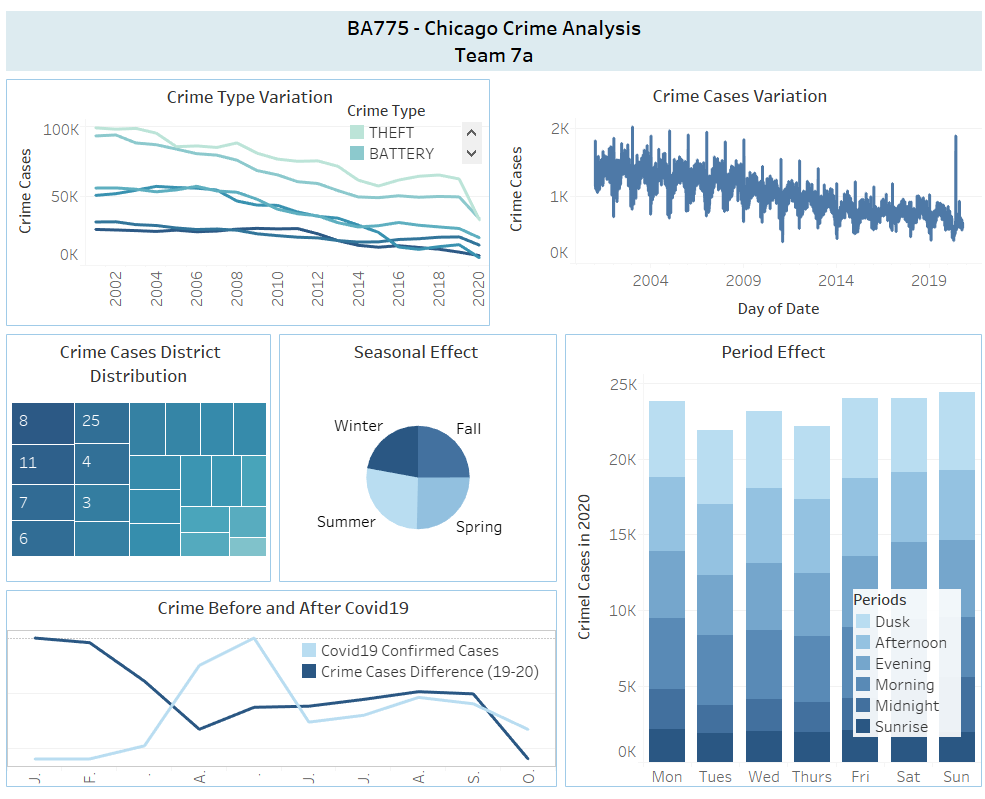